### Import libraries

In [1]:
import sys 
sys.path.append('/net/noble/vol3/user/ssontha2/classes/CSE583/fish_eeg/src/fish_eeg')
from constants import sampling_frequency
from data import load_data
from preprocess import Preprocessor
from denoisers import Denoiser
from filters import Filter
from plotting import plot_waveforms, plot_fft
from fft import FFT
from utils import get_channels
from reconstruct import Reconstructor
import pandas as pd
import numpy as np


### 1. Load data

In [2]:
path = '/net/noble/vol3/user/ssontha2/classes/CSE583/fish_eeg/data'
subjid = 'hydrolagusColliei_8'
eegdataset= load_data(path, subjid)

### 2. Preprocess

In [3]:
preprocessor = Preprocessor(eegdataset)
cleaned_eegdataset = preprocessor.pipeline()


In [4]:
channel_keys = get_channels(cleaned_eegdataset)

(<Figure size 800x400 with 4 Axes>,
 array([<Axes: ylabel='ch1'>, <Axes: ylabel='ch2'>, <Axes: ylabel='ch3'>,
        <Axes: ylabel='ch4'>], dtype=object))

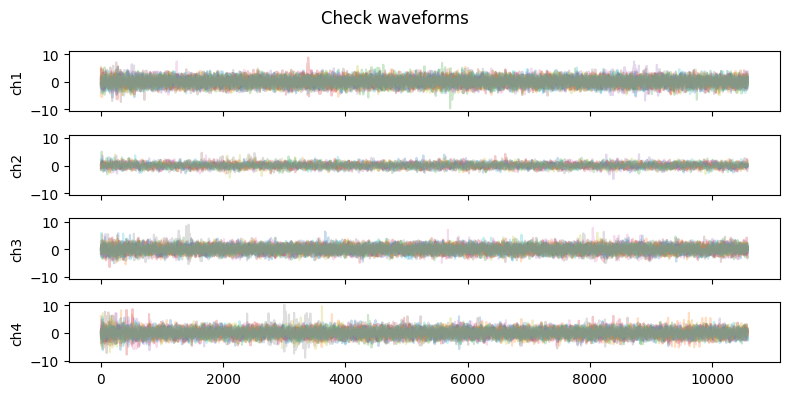

In [5]:
plot_waveforms(cleaned_eegdataset.rms_subsampled_data.item()[(55,115)], channel_keys, title='Check waveforms', num_samples=10, figsize=(8, 4), alpha=0.25)

In [6]:
filter = Filter(eegdataset)
eegdataset = filter.pipeline(70, 1400, sampling_frequency)

(<Figure size 800x400 with 4 Axes>,
 array([<Axes: ylabel='ch1'>, <Axes: ylabel='ch2'>, <Axes: ylabel='ch3'>,
        <Axes: ylabel='ch4'>], dtype=object))

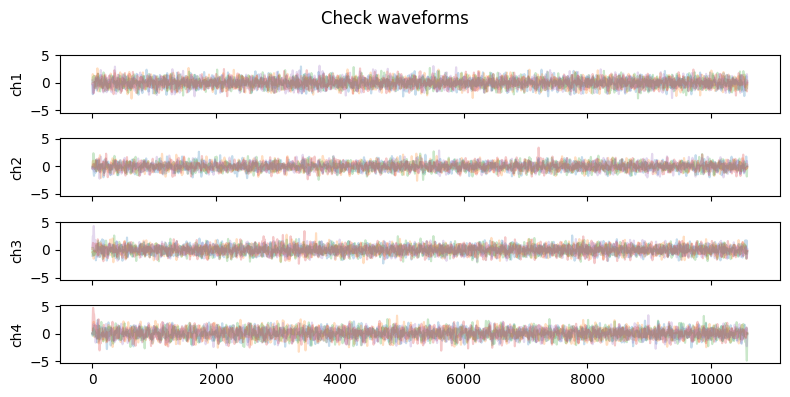

In [7]:
plot_waveforms(eegdataset.bandpass_data.item()[(55,115)], channel_keys, 
               title='Check waveforms', num_samples=5, figsize=(8, 4), alpha=0.25)

### 3. Denoise

In [8]:
denoiser = Denoiser(eegdataset)
eegdataset =denoiser.pipeline()

Elapsed time: 2.74 seconds
ICA Convergence: 9
Elapsed time: 2.91 seconds
ICA Convergence: 11
Elapsed time: 3.24 seconds
ICA Convergence: 5
Elapsed time: 4.92 seconds
ICA Convergence: 9
Elapsed time: 9.93 seconds
ICA Convergence: 7
Elapsed time: 3.42 seconds
ICA Convergence: 8
Elapsed time: 4.51 seconds
ICA Convergence: 8
Elapsed time: 3.72 seconds
ICA Convergence: 14
Elapsed time: 4.91 seconds
ICA Convergence: 9
Elapsed time: 11.95 seconds
ICA Convergence: 12
Elapsed time: 2.76 seconds
ICA Convergence: 6
Elapsed time: 6.04 seconds
ICA Convergence: 7
Elapsed time: 18.51 seconds
ICA Convergence: 6
Elapsed time: 9.03 seconds
ICA Convergence: 13
Elapsed time: 10.35 seconds
ICA Convergence: 14
Elapsed time: 1.79 seconds
ICA Convergence: 6
Elapsed time: 13.16 seconds
ICA Convergence: 10
Elapsed time: 10.34 seconds
ICA Convergence: 10
Elapsed time: 10.78 seconds
ICA Convergence: 8
Elapsed time: 11.11 seconds
ICA Convergence: 9
Elapsed time: 7.94 seconds
ICA Convergence: 5
Elapsed time: 56.23 

### 4. FFT

In [9]:
fft = FFT(eegdataset)
eegdataset = fft.pipeline(sampling_frequency)

(<Figure size 800x400 with 4 Axes>,
 array([<Axes: ylabel='0'>, <Axes: ylabel='1'>, <Axes: ylabel='2'>,
        <Axes: ylabel='3'>], dtype=object))

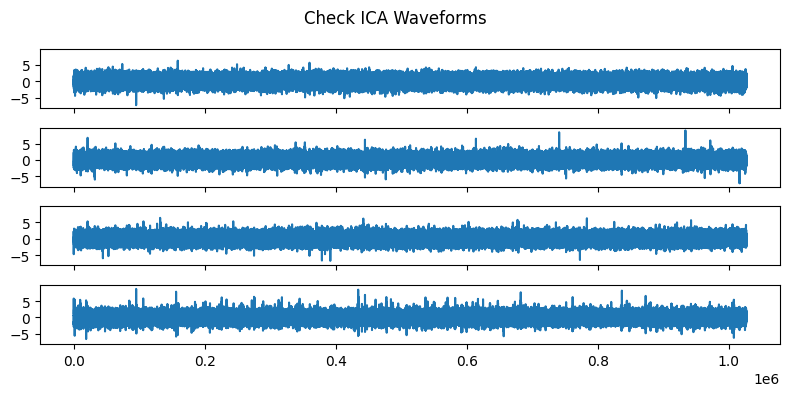

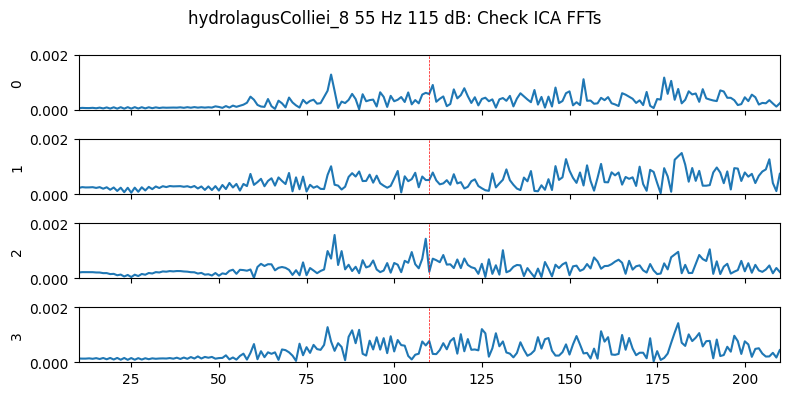

In [10]:
plot_waveforms(eegdataset.ica_output[(55,115)]['S'], channel_keys=[], 
               title='Check ICA Waveforms', num_samples=[], figsize=(8, 4), alpha=1.0)
plot_fft(eegdataset.ica_fft_output[(55,115)][0], eegdataset.ica_fft_output[(55,115)][1], 55, 115, subjid, 0, channel_keys=[], period_keys=[],
         title='Check ICA FFTs', num_samples=5, figsize=(8, 4), alpha=1.0,xlim=[55*2-100,55*2+100], ylim=[0,0.002])


### 5. Reconstruct

In [11]:
reconstructor = Reconstructor(eegdataset)
eegdataset =reconstructor.pipeline(weighted=False)

In [12]:
eegdataset

EEGDataset(data=array({(np.float64(55.0), np.float64(115.0)): {'filename': 'data\\hydrolagusColliei_8_AdaptiveAEP_Ratfish_2506211524_1_run.mat', 'decision': array([[1.]]), 'period_len': 3528, 'ch1': array([[ 1.13919523,  0.29854812,  0.51171346, ...,  0.24535885,
         0.71333113,  0.17893058],
       [-0.53218433, -0.06263737,  0.94265154, ..., -0.704058  ,
         1.99663896,  3.66895166],
       [ 2.37567084,  1.16514833,  0.0586715 , ..., -1.92881097,
        -1.78592312, -0.78063422],
       ...,
       [ 0.52711035, -1.10291921, -1.87754631, ..., -0.50617291,
        -0.01370557, -0.80273809],
       [ 0.82851623,  0.15274419,  0.2325281 , ...,  1.65131694,
         1.86232438,  0.56490273],
       [ 2.03851384,  2.79068714,  2.93614113, ..., -1.96881957,
        -0.88677948, -1.29520543]], shape=(100, 10584)), 'ch2': array([[ 1.83689618,  1.50323847,  1.31520973, ..., -0.0951808 ,
        -0.09308123, -0.0600129 ],
       [-0.06205415,  0.44131932,  0.61360124, ...,  1.10729

In [24]:
eegdataset.reconstructed_ica_data[(55,115)]

{'ch2': array([[ 1.31333112,  1.29096322,  1.30026123, ..., -0.01933692,
         -0.08240119, -0.15598486],
        [ 1.33096762,  1.17221977,  1.02860788, ..., -0.49719474,
         -0.16811041,  0.18577752],
        [ 0.7579873 ,  0.85531015,  0.92558709, ...,  0.74815988,
          0.46054907,  0.13132518],
        ...,
        [-0.12458058,  0.76594925,  1.58854925, ..., -0.34115586,
          0.07091471,  0.49342663],
        [ 0.3243161 ,  0.10449376, -0.0910022 , ...,  0.34637011,
          0.14150807, -0.0698953 ],
        [-0.20768627,  0.05453342,  0.31199673, ...,  0.0069129 ,
         -0.11424679, -0.24773878]], shape=(97, 10584)),
 'ch4': array([[ 0.06239134,  0.03829413,  0.02054646, ..., -0.27472662,
         -0.22018357, -0.1517478 ],
        [ 1.13232046,  2.03151576,  2.86066664, ..., -0.39375338,
         -0.32003018, -0.24504608],
        [-0.37204248, -2.13546353, -3.76896822, ...,  0.77097247,
          0.43604406,  0.08584466],
        ...,
        [ 0.79586912,

In [25]:
def separate_periods(data, period_keys, channel_keys, latency):
    separated_data = {
        'prestim': {},
        'stimresp': {}
    }

    period_len = 3528
        
    for period in period_keys:
        for channel in channel_keys:            
            if period == 'prestim':
                separated_data[period][channel] = data[channel][:,latency:latency+period_len]     
            elif period == 'stimresp':
                separated_data[period][channel] = data[channel][:,latency+period_len:latency+period_len*2]
                
    return separated_data

In [28]:
a = 'fish eeg'

In [29]:
type(a)

str

In [30]:
a.split()

['fish', 'eeg']

In [31]:
a = 5

In [32]:
a.split()

AttributeError: 'int' object has no attribute 'split'

In [59]:
eegdataset.rms_subsampled_data.item()[(55,115)]

{'ch4': array([[-0.8898122 ,  0.31470319, -0.12813249, ..., -1.29374739,
         -2.20706318, -1.93575124],
        [-0.62234948, -0.42172327, -0.49293391, ..., -0.60666097,
          0.53405062,  1.33223963],
        [ 1.06646823,  0.47986988, -1.26651122, ..., -1.29223103,
         -0.74155877, -0.20995765],
        ...,
        [-0.57242621, -0.75771384, -0.40766778, ...,  0.14667875,
          0.27988522, -0.20744983],
        [ 0.44242743,  0.21771442, -0.05260606, ..., -0.90911664,
         -0.12200872, -0.25562344],
        [-0.43478731, -0.16335872, -1.19051821, ..., -0.28653387,
         -0.2422678 , -0.98895887]], shape=(97, 10584)),
 'ch4_total_trials': np.int64(97),
 'ch1': array([[ 1.63358718e-01, -9.23586218e+00,  2.83821922e+00, ...,
          1.68811785e+00,  1.50481316e+00,  8.24433717e-01],
        [ 7.74510453e-01, -5.28393426e+00,  5.44991745e+00, ...,
         -3.04730204e-01, -1.47670216e-01, -6.02461820e-02],
        [ 1.50236365e-01, -2.93176701e+00,  1.4104488

In [ ]:
separated_data = separate_periods(recon_restruct_data, current_cond, period_keys, channel_keys, latency)
